### Immigrants all over the World - Curso Coursera: Data Visualization with Python 

A divisão populacional das Nações Unidas compilou dados de imigração pertencentes a 45 países. Os dados consistem no número total de imigrantes de todo o mundo para cada um dos 45 países, bem como outros metadados pertencentes aos países de origem dos imigrantes.

O foco do curso será a imigração para o Canadá

### Import das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

print ('Matplotlib version: ', matplotlib.__version__) 
print ('Numpy version: ', np.__version__) 
print ('Pandas version: ', pd.__version__)

warnings.filterwarnings('ignore')

Matplotlib version:  3.2.1
Numpy version:  1.17.4
Pandas version:  0.24.2


In [2]:
print(plt.style.available)
matplotlib.style.use(['seaborn'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Carregando o conjunto de dados

In [3]:
df_canada = pd.read_excel('canada.xlsx', sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)

### Caracteríticas dos dados

In [4]:
print('Shape dataset: {}'.format(df_canada.shape))

Shape dataset: (195, 43)


In [5]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_canada.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [7]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [8]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### Seleção de dados

In [9]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

### Pré-processamento

In [10]:
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [11]:
df_canada['Total'] = df_canada.sum(axis=1)

In [12]:
df_canada.set_index('Country', inplace=True)

In [13]:
df_canada.isnull().sum()

Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [14]:
df_canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


### Visualização dos dados

#### Line plot

O melhor caso de uso para um gráfico de linhas é quando você tem um conjunto de dados contínuo e está interessado em visualizá-los por um período de tempo.

In [15]:
years = list(map(int, range(1980, 2014)))

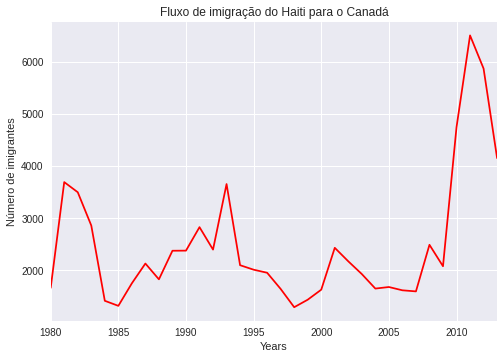

In [16]:
df_canada.loc['Haiti', years].plot(kind='line', color='r')

plt.rcParams['figure.figsize'] = [8, 4]
plt.title('Fluxo de imigração do Haiti para o Canadá', size=12)
plt.ylabel('Número de imigrantes')
plt.xlabel('Years')
plt.show()

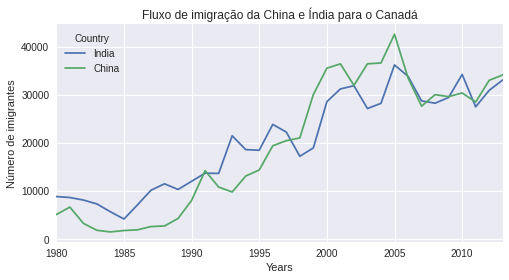

In [17]:
df_CI = df_canada.loc[['India', 'China'], years]
df_CI = df_CI.transpose()

df_CI.plot(kind='line')

plt.rcParams['figure.figsize'] = [8, 4]
plt.title('Fluxo de imigração da China e Índia para o Canadá', size=12)
plt.ylabel('Número de imigrantes')
plt.xlabel('Years')
plt.show()

#### Plot area

É baseado no gráfico de linhas e é comumente usado ao tentar comparar duas ou mais quantidades.

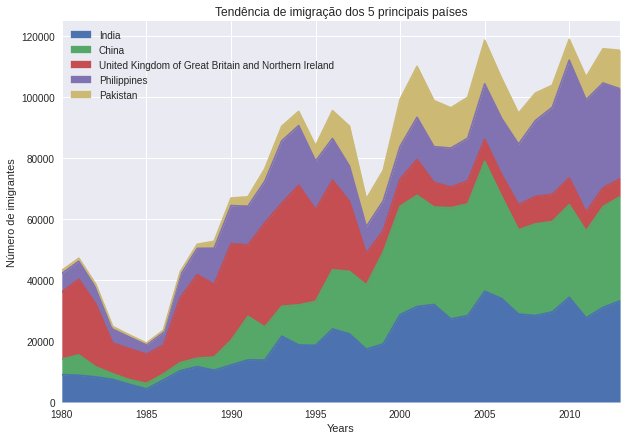

In [18]:
df_canada.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_canada.head()
df_top5.drop(['Continent', 'Region', 'DevName', 'Total'], axis=1, inplace=True)
df_top5 = df_top5.transpose()

df_top5.plot(kind='area', figsize=(10, 7))

plt.title('Tendência de imigração dos 5 principais países', size=12)
plt.ylabel('Número de imigrantes')
plt.xlabel('Years')
plt.legend(loc='best')
plt.show()

#### Histograma

É uma maneira de representar a distribuição de frequência de um conjunto de dados numérico.

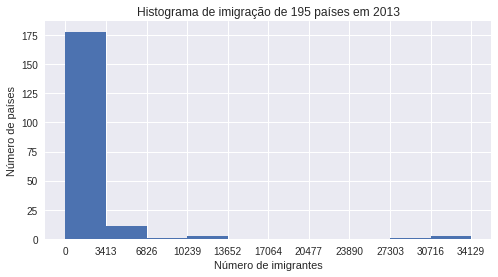

In [19]:
count, bin_edges = np.histogram(df_canada[2013])

df_canada[2013].plot(kind='hist', xticks=bin_edges, figsize=(8, 4))

plt.title('Histograma de imigração de 195 países em 2013', size=12)
plt.ylabel('Número de países')
plt.xlabel('Número de imigrantes')
plt.show()

#### Bar Charts

É comumente usado para comparar os valores de uma variável em um determinado momento.

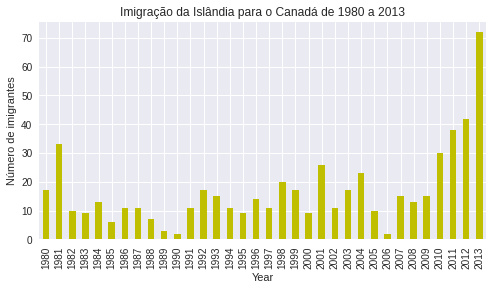

In [20]:
df_iceland = df_canada.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(8, 4), color='y')

plt.title('Imigração da Islândia para o Canadá de 1980 a 2013', size=12)
plt.ylabel('Número de imigrantes')
plt.xlabel('Year')
plt.show()

#### Pie charts

É um gráfico estatístico circular dividido em fatias para ilustrar a proporção numérica.

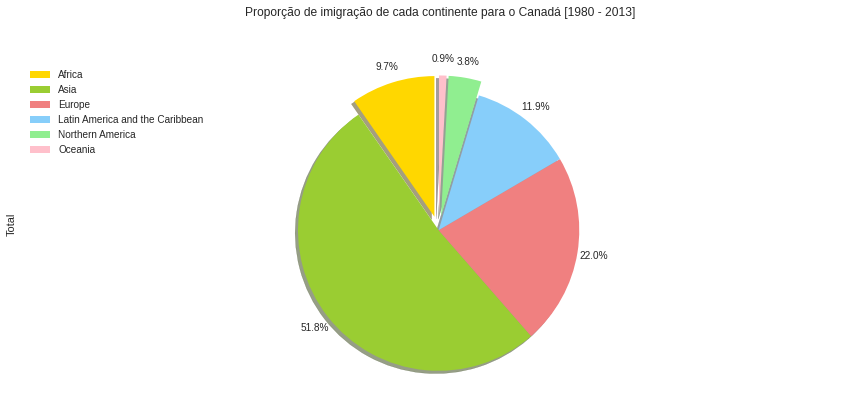

In [21]:
df_continents = df_canada.groupby('Continent', axis=0).sum()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                            )

plt.title('Proporção de imigração de cada continente para o Canadá [1980 - 2013]', y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

#### Box Plots

É uma maneira de representar estatisticamente a distribuição de dados fornecidos através de cinco dimensões principais: valor mínimo, primeiro quartil, mediana, terceiro quartil e valor máximo.

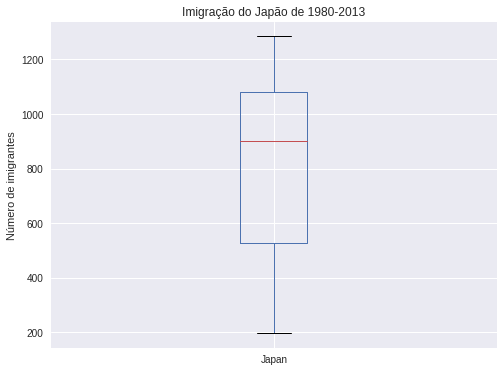

In [22]:
df_japan = df_canada.loc[['Japan'], years].transpose()

df_japan.plot(kind='box', figsize=(8, 6))
plt.title('Imigração do Japão de 1980-2013', size=12)
plt.ylabel('Número de imigrantes')
plt.show()

#### Scatter Plots

É um tipo de gráfico que exibe valores pertencentes a tipicamente duas variáveis, uma contra a outra.

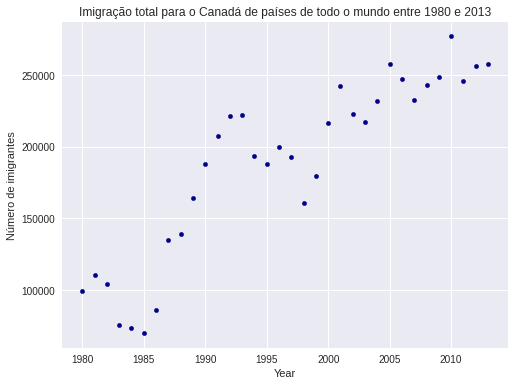

In [23]:
df_total = pd.DataFrame(df_canada[years].sum(axis=0))

df_total.index = map(int, df_total.index)
df_total.reset_index(inplace=True)
df_total.columns = ['Year', 'Total']

df_total.plot(kind='scatter', x='Year', y='Total', figsize=(8, 6), color='darkblue')

plt.title('Imigração total para o Canadá de países de todo o mundo entre 1980 e 2013', size=12)
plt.ylabel('Número de imigrantes')
plt.xlabel('Year')
plt.show()

#### Bubble plot

É uma variação do gráfico de dispersão que exibe três dimensões de dados (x, y, z).

In [24]:
df_can_t = df_canada[years].transpose()

df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

norm_br= (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
norm_arg= (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

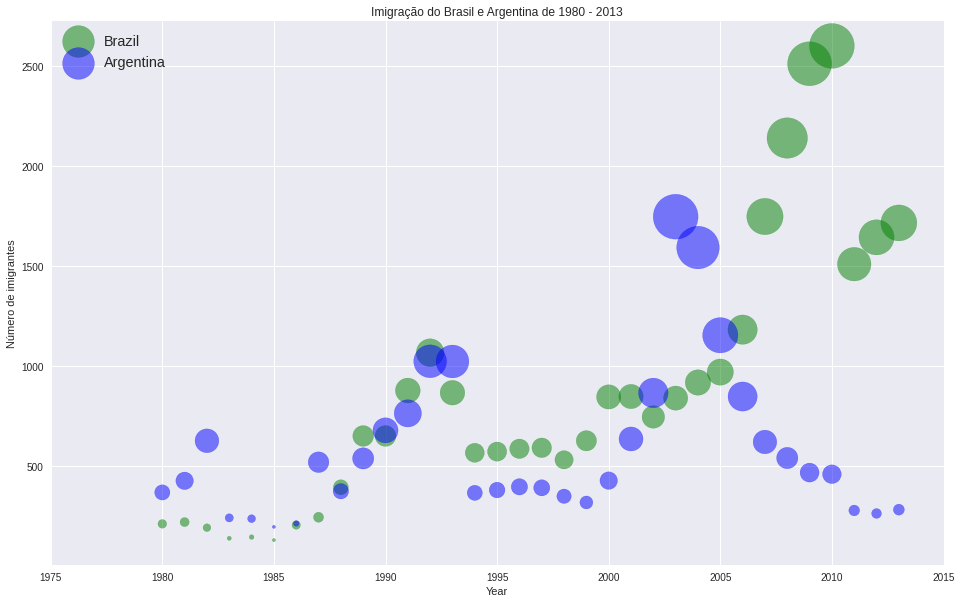

In [25]:
# Brazil
ax0 = df_can_t.plot(kind='scatter', 
                    x='Year', 
                    y='Brazil', 
                    figsize=(16, 10), 
                    alpha=0.5,
                    color='green',
                    s=norm_br * 2000 + 10,
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color='blue',
                    s=norm_arg * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Número de imigrantes')
ax0.set_title('Imigração do Brasil e Argentina de 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

#### Waffle Charts

É uma maneira de visualizar dados em relação a um todo ou destacar o progresso em relação a um determinado limite.

In [26]:
import matplotlib.patches as mpatches

O primeiro passo para criar um gráfico de waffles é determinar a proporção de cada categoria em relação ao total.

In [27]:
df_dsn = df_canada.loc[['Denmark', 'Norway', 'Sweden'], :]

total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


O segundo passo é definir o tamanho geral do gráfico de waffles.

In [28]:
width= 40
height= 10
total_num_tiles = width * height
print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


O terceiro passo é usar a proporção de cada categoria para determinar seu respectivo número de peças.

In [29]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


A quarta etapa é criar uma matriz que se assemelha ao gráfico de waffles e a preencher.

In [30]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1

        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1       
            
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Cria o gráfico.

<Figure size 576x288 with 0 Axes>

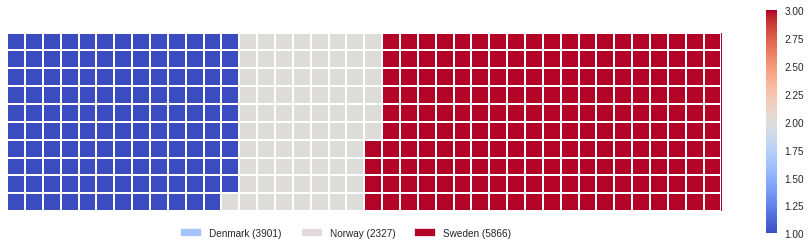

In [31]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

#### Word Clouds

É uma representação da importância de diferentes palavras no corpo do texto.

In [32]:
#!conda install -c conda-forge wordcloud==1.4.1 --yes

In [33]:
from wordcloud import WordCloud, STOPWORDS

In [34]:
total_immigration = df_canada['Total'].sum()
total_immigration

6409153

In [35]:
max_words = 90
word_string = ''
for country in df_canada.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_canada.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
word_string

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

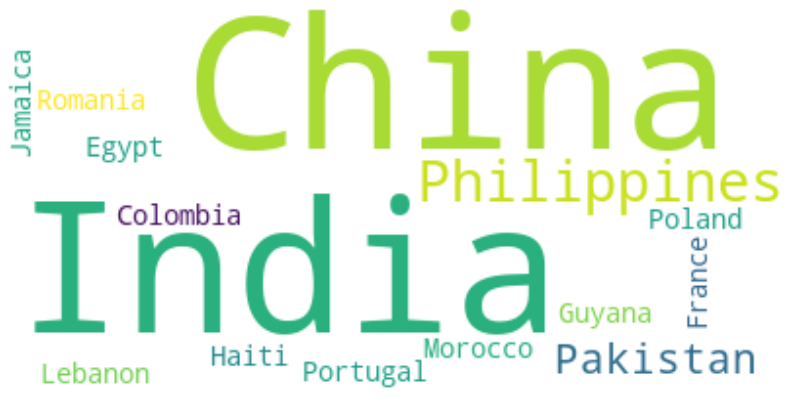

In [36]:
wordcloud = WordCloud(background_color='white').generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Seaborn

In [37]:
import seaborn as sns

[Text(0.5, 1.0, 'Imigração total para o Canadá de países de todo o mundo entre 1980 e 2013')]

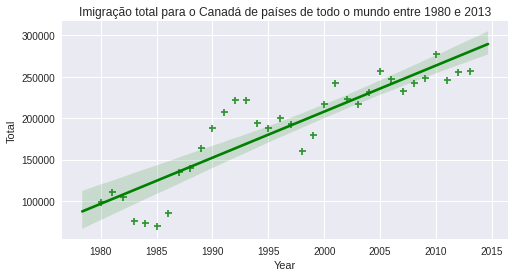

In [38]:
ax= sns.regplot(x='Year', y='Total', data=df_total, color='green', marker='+')
ax.set(title='Imigração total para o Canadá de países de todo o mundo entre 1980 e 2013')

### Folium

In [39]:
#!pip install folium

In [40]:
import folium

In [41]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=3)
world_map

In [42]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=3, tiles='Stamen Toner')
world_map

In [43]:
world_map = folium.Map(location=[56.130, -106.35], zoom_start=3, tiles='Stamen Terrain')
world_map

#### Maps with Markers

In [44]:
canada_map = folium.Map(location=[56.130, -106.35], zoom_start=3)

ontario = folium.map.FeatureGroup()
ontario.add_child(
    folium.CircleMarker(
        [51.25, -85.32], 
        radius=5, 
        color='red', 
        fill_color='Red'
    )
)

canada_map.add_child(ontario)

folium.Marker([51.25, -85.32], popup='Ontario').add_to(canada_map)
canada_map

#### Incidentes em São Francisco

In [45]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [46]:
df_incidents.head(2)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168


In [47]:
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.shape

(100, 13)

In [48]:
latitude = 37.77
longitude = -122.42

In [49]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

In [50]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
sanfran_map.add_child(incidents)

In [51]:
from folium import plugins

sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

incidents = plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

sanfran_map

#### Choropleth Maps

Mapa temático no qual as áreas são sombreadas ou padronizadas na proporção da medida da variável estatística exibida no mapa.

In [52]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [53]:
world_geo = r'world_countries.json'
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

In [54]:
threshold_scale = np.linspace(df_canada['Total'].min(),
                              df_canada['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1] + 1

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_canada.reset_index(),
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map